# Comparison between Human Vision and Computer Vision to perceive Kanizsa Illusion.

This project is based on the Zhaoyang Pang et al. paper, It is recommended to read the report given in the same directory first and the reference paper provided on which this project is based, to understand this implementation.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt

from model_utilities import cifar_dataset,get_square_pac_data,results
from Model_and_train import pc_model,predict_encoder,train_pc_model,classifier_model

We import Cifar100 dataset of natural images to train our predictive coding feedback network

In [2]:
(X_train_cifar,y_train_cifar),(X_test_cifar,y_test_cifar) = cifar_dataset()

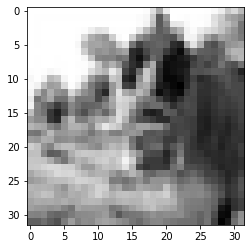

In [3]:
plt.imshow(X_train_cifar[0],cmap="gray")

Next we define the predictive coding model as defined by Zhaoyang Pang et al. Please see the Model_and_train.py file available in the same directory to compare the implementation proposed in the paper and our implementation. 

Description: The model consists of 3 feedforward encoding layers, e1,e2,e3, and three corresponding decoding generative layers d0,d1,d2, which predict the lower layer activations. The errors in prediction are used to update the activity of the encoding layer below them at each timestamp. The error of a layer n at any timestamp t can be given as,
                                                    
                                                    єn(t)=en(t)-dn(t). 
This error is used to update the activationd of encoding layer e(n+1).


In [4]:
encoder0,encoder1,encoder2,autoencoder0,autoencoder1,autoencoder2 = pc_model(image_dim = (32,32,1))

In [5]:
autoencoder0.summary()

Model: "autoencoder0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              525312    
_________________________________________________________________
reshape (Reshape)            (None, 32, 32, 1)         0         
Total params: 1,050,112
Trainable params: 1,050,112
Non-trainable params: 0
_________________________________________________________________


In [6]:
autoencoder1.summary()

Model: "autoencoder1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e1_dash (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               131584    
Total params: 262,912
Trainable params: 262,912
Non-trainable params: 0
_________________________________________________________________


In [7]:
autoencoder2.summary()

Model: "autoencoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e1_dash (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               16640     
Total params: 33,088
Trainable params: 33,088
Non-trainable params: 0
_________________________________________________________________


In [8]:
encoder0.summary()

Model: "encoder0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 32, 32, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
Total params: 524,800
Trainable params: 524,800
Non-trainable params: 0
_________________________________________________________________


In [9]:
encoder1.summary()

Model: "encoder1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e1_dash (InputLayer)         [(None, 512)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
Total params: 131,328
Trainable params: 131,328
Non-trainable params: 0
_________________________________________________________________


In [10]:
encoder2.summary()

Model: "encoder2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e1_dash (InputLayer)         [(None, 256)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
Total params: 16,448
Trainable params: 16,448
Non-trainable params: 0
_________________________________________________________________


## Training
As discussed in the report the training is divided in two stps, first we train the predictinve coding feedback network on Cifar100 images. Then we add a classifiaction head to the predictive coding feedback network model. Once we have a complete model we train this on images of real squares and random pacman orientation. Once training is finished we test the model on Kanizsa square illusion and check if the model classifies it as square (which means the model is capable of perceiving illusion ) or does the model classify it as pacman? Which means this kind of model cannot perceive such illusions. 

In [11]:
encoder0,encoder1,encoder2,autoencoder0,autoencoder1,autoencoder2= train_pc_model(encoder0,encoder1,encoder2,autoencoder0,autoencoder1,autoencoder2,X_train_cifar, epochs = 2, batch_size = 500)


(100, 500, 32, 32, 1)
**************************Running EPOCH  0  OF  2 ****************
*********Batch numer,  0 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 876us/sample - loss: 0.0581 - val_loss: 0.0551
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 683us/sample - loss: 0.0792 - val_loss: 0.0376
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 747us/sample - loss: 0.1504 - val_loss: 0.1131
*********Batch numer,  1 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 194us/sample - loss: 0.0506 - val_loss: 0.0476
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 100us/sample - loss: 0.0501 - val_loss: 0.0298
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 77us/sample - loss: 0.0728

450/450 [==============================] - 0s 96us/sample - loss: 0.0247 - val_loss: 0.0208
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 65us/sample - loss: 0.0623 - val_loss: 0.0545
*********Batch numer,  18 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 192us/sample - loss: 0.0263 - val_loss: 0.0248
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 100us/sample - loss: 0.0231 - val_loss: 0.0186
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 73us/sample - loss: 0.0693 - val_loss: 0.0633
*********Batch numer,  19 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 204us/sample - loss: 0.0284 - val_loss: 0.0266
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 94us/sample - loss: 0.0

450/450 [==============================] - 0s 223us/sample - loss: 0.0194 - val_loss: 0.0188
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 105us/sample - loss: 0.0300 - val_loss: 0.0271
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 67us/sample - loss: 0.0537 - val_loss: 0.0454
*********Batch numer,  36 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 218us/sample - loss: 0.0182 - val_loss: 0.0158
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 89us/sample - loss: 0.0293 - val_loss: 0.0259
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 69us/sample - loss: 0.0544 - val_loss: 0.0416
*********Batch numer,  37 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 204us/sample - loss: 0.

450/450 [==============================] - 0s 73us/sample - loss: 0.0378 - val_loss: 0.0380
*********Batch numer,  53 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 233us/sample - loss: 0.0128 - val_loss: 0.0177
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 102us/sample - loss: 0.0296 - val_loss: 0.0273
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 65us/sample - loss: 0.0374 - val_loss: 0.0347
*********Batch numer,  54 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 249us/sample - loss: 0.0134 - val_loss: 0.0120
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 92us/sample - loss: 0.0274 - val_loss: 0.0272
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 67us/sample - loss: 0.0

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 97us/sample - loss: 0.0267 - val_loss: 0.0252
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 61us/sample - loss: 0.0397 - val_loss: 0.0428
*********Batch numer,  71 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 195us/sample - loss: 0.0116 - val_loss: 0.0132
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 93us/sample - loss: 0.0315 - val_loss: 0.0297
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 66us/sample - loss: 0.0414 - val_loss: 0.0383
*********Batch numer,  72 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 196us/sample - loss: 0.0114 - val_loss: 0.0093
Train on 450 samples, validate on 50 samples
450/450 [================

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 216us/sample - loss: 0.0098 - val_loss: 0.0106
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 88us/sample - loss: 0.0276 - val_loss: 0.0297
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 73us/sample - loss: 0.0396 - val_loss: 0.0427
*********Batch numer,  89 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 210us/sample - loss: 0.0099 - val_loss: 0.0105
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 92us/sample - loss: 0.0347 - val_loss: 0.0395
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 63us/sample - loss: 0.0435 - val_loss: 0.0452
*********Batch numer,  90 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [================

450/450 [==============================] - 0s 96us/sample - loss: 0.0277 - val_loss: 0.0249
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 70us/sample - loss: 0.0428 - val_loss: 0.0405
*********Batch numer,  106 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 210us/sample - loss: 0.0103 - val_loss: 0.0109
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 98us/sample - loss: 0.0314 - val_loss: 0.0300
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 66us/sample - loss: 0.0434 - val_loss: 0.0389
*********Batch numer,  107 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 201us/sample - loss: 0.0092 - val_loss: 0.0095
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 90us/sample - loss: 0.

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 189us/sample - loss: 0.0083 - val_loss: 0.0088
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 93us/sample - loss: 0.0346 - val_loss: 0.0324
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 68us/sample - loss: 0.0470 - val_loss: 0.0449
*********Batch numer,  124 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 221us/sample - loss: 0.0086 - val_loss: 0.0098
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 95us/sample - loss: 0.0368 - val_loss: 0.0349
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 61us/sample - loss: 0.0468 - val_loss: 0.0467
*********Batch numer,  125 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============

450/450 [==============================] - 0s 95us/sample - loss: 0.0329 - val_loss: 0.0321
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 66us/sample - loss: 0.0427 - val_loss: 0.0411
*********Batch numer,  141 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 205us/sample - loss: 0.0088 - val_loss: 0.0085
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 93us/sample - loss: 0.0326 - val_loss: 0.0323
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 70us/sample - loss: 0.0439 - val_loss: 0.0411
*********Batch numer,  142 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 208us/sample - loss: 0.0086 - val_loss: 0.0082
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 92us/sample - loss: 0.

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 217us/sample - loss: 0.0081 - val_loss: 0.0088
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 93us/sample - loss: 0.0311 - val_loss: 0.0301
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 70us/sample - loss: 0.0383 - val_loss: 0.0380
*********Batch numer,  159 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 208us/sample - loss: 0.0082 - val_loss: 0.0094
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 98us/sample - loss: 0.0327 - val_loss: 0.0330
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 69us/sample - loss: 0.0385 - val_loss: 0.0384
*********Batch numer,  160 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============

Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 69us/sample - loss: 0.0355 - val_loss: 0.0350
*********Batch numer,  176 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 214us/sample - loss: 0.0075 - val_loss: 0.0081
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 96us/sample - loss: 0.0346 - val_loss: 0.0308
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 73us/sample - loss: 0.0360 - val_loss: 0.0343
*********Batch numer,  177 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 207us/sample - loss: 0.0075 - val_loss: 0.0083
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 96us/sample - loss: 0.0340 - val_loss: 0.0358
Train on 450 samples, validate on 50 samples
450/450 [==============

450/450 [==============================] - 0s 202us/sample - loss: 0.0072 - val_loss: 0.0083
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 96us/sample - loss: 0.0362 - val_loss: 0.0339
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 69us/sample - loss: 0.0356 - val_loss: 0.0342
*********Batch numer,  194 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 220us/sample - loss: 0.0076 - val_loss: 0.0068
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 108us/sample - loss: 0.0322 - val_loss: 0.0310
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 62us/sample - loss: 0.0368 - val_loss: 0.0363
*********Batch numer,  195 of  100.0 ****************
Train on 450 samples, validate on 50 samples
450/450 [==============================] - 0s 211us/sample - loss: 

Now we have trained the predictive model on Cifar100, lets collect the manually generated data for squares, random orientation pacman, all in pacman and all out pacman images. These images are manually genrated by Adheena Reji, IIT Delhi. 

In [12]:
labels = ['Random_pacman32x32','Square_images32x32']
classifier_train_data,train_data_label = get_square_pac_data('DATA_SET',labels)

In [13]:
labels = ['All_out_pacman32x32','All_in_pacman32x32']
classifier_test,classifier_test_label = get_square_pac_data('DATA_SET',labels)

### Square_image

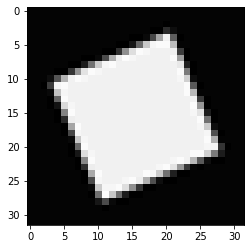

In [14]:

plt.imshow(classifier_train_data[274],cmap='gray')

### Random_pacman

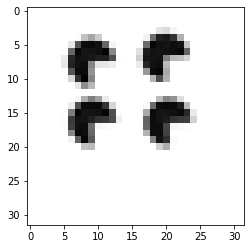

In [15]:
plt.imshow(classifier_train_data[0],cmap='gray')

### All_out_pacman

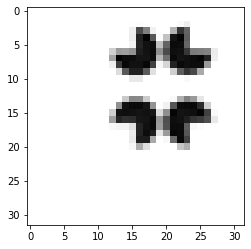

In [16]:
plt.imshow(classifier_test[0],cmap='gray')

### All_in_pacman

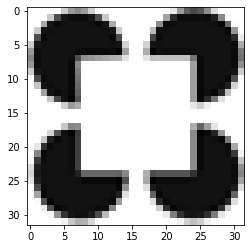

In [17]:
plt.imshow(classifier_test[170],cmap='gray')

In [18]:
clspre = predict_encoder(encoder0,encoder1,encoder2,classifier_train_data)
clspre2 = predict_encoder(encoder0,encoder1,encoder2,classifier_test)

(448, 512)
(448, 256)
(448, 64)
(254, 512)
(254, 256)
(254, 64)


#### This is how the encoded image looks like. The 32x32 size image is encoded into 8x8 size

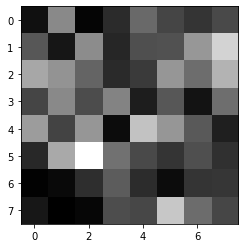

In [19]:
plt.imshow(clspre[300].reshape(8,8),cmap='gray')

## Classification (training and testing)
Now lets add the Classifier model as head on top of the encoder model, then train our complete model on square images and random orientation pacman images as shown above in the pictures. After training we validate this model by testing it on kanizsa illusion (all in pacman) and all out pacman orientations. This classification head we add can be seen as ITC(inferior Temporal Cortex) and the predictive model as the preposseing mechanism in the occipital lobe that sends the information to ITC for classifiaction.

In [20]:
predicted_train = predict_encoder(encoder0,encoder1,encoder2,classifier_train_data)
predicted_test = predict_encoder(encoder0,encoder1,encoder2,classifier_test)

predicted_train.shape


(448, 512)
(448, 256)
(448, 64)
(254, 512)
(254, 256)
(254, 64)


(448, 8, 8, 1)

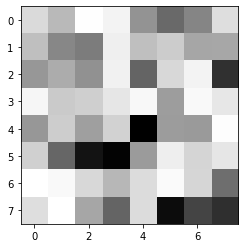

In [21]:
plt.imshow(predicted_train[0],cmap='gray')

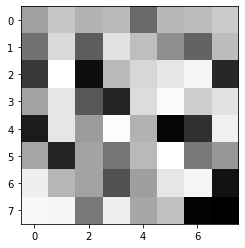

In [22]:
plt.imshow(predicted_test[170],cmap='gray')

In [23]:
predictive_classifier_test_illusion = classifier_model((8,8,1))

In [24]:
opt = keras.optimizers.Adam(lr=0.0001)
predictive_classifier_test_illusion.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [25]:
test_illusion = predictive_classifier_test_illusion.fit(predicted_train,train_data_label,epochs = 500 , validation_data = (predicted_test[150:-1], classifier_test_label[150:-1]))

Train on 448 samples, validate on 103 samples
Epoch 1/500
448/448 [==============================] - 0s 974us/sample - loss: 0.6898 - accuracy: 0.5112 - val_loss: 0.7677 - val_accuracy: 0.0388
Epoch 2/500
448/448 [==============================] - 0s 177us/sample - loss: 0.6737 - accuracy: 0.5580 - val_loss: 0.8006 - val_accuracy: 0.0388
Epoch 3/500
448/448 [==============================] - 0s 145us/sample - loss: 0.6663 - accuracy: 0.5580 - val_loss: 0.8272 - val_accuracy: 0.0388
Epoch 4/500
448/448 [==============================] - 0s 149us/sample - loss: 0.6598 - accuracy: 0.5402 - val_loss: 0.8509 - val_accuracy: 0.0388
Epoch 5/500
448/448 [==============================] - 0s 173us/sample - loss: 0.6609 - accuracy: 0.5424 - val_loss: 0.8610 - val_accuracy: 0.0388
Epoch 6/500
448/448 [==============================] - 0s 167us/sample - loss: 0.6546 - accuracy: 0.5424 - val_loss: 0.8743 - val_accuracy: 0.0388
Epoch 7/500
448/448 [==============================] - 0s 152us/sample -

448/448 [==============================] - 0s 157us/sample - loss: 0.3735 - accuracy: 0.9799 - val_loss: 1.1415 - val_accuracy: 0.0583
Epoch 57/500
448/448 [==============================] - 0s 142us/sample - loss: 0.3712 - accuracy: 0.9888 - val_loss: 1.1533 - val_accuracy: 0.0485
Epoch 58/500
448/448 [==============================] - 0s 146us/sample - loss: 0.3656 - accuracy: 0.9911 - val_loss: 1.1618 - val_accuracy: 0.0485
Epoch 59/500
448/448 [==============================] - 0s 160us/sample - loss: 0.3676 - accuracy: 0.9844 - val_loss: 1.1725 - val_accuracy: 0.0485
Epoch 60/500
448/448 [==============================] - 0s 148us/sample - loss: 0.3646 - accuracy: 0.9888 - val_loss: 1.1637 - val_accuracy: 0.0485
Epoch 61/500
448/448 [==============================] - 0s 142us/sample - loss: 0.3652 - accuracy: 0.9844 - val_loss: 1.1679 - val_accuracy: 0.0485
Epoch 62/500
448/448 [==============================] - 0s 151us/sample - loss: 0.3646 - accuracy: 0.9799 - val_loss: 1.1793 

448/448 [==============================] - 0s 170us/sample - loss: 0.3299 - accuracy: 0.9978 - val_loss: 1.2167 - val_accuracy: 0.0583
Epoch 112/500
448/448 [==============================] - 0s 169us/sample - loss: 0.3303 - accuracy: 0.9978 - val_loss: 1.2140 - val_accuracy: 0.0583
Epoch 113/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3295 - accuracy: 0.9978 - val_loss: 1.2178 - val_accuracy: 0.0583
Epoch 114/500
448/448 [==============================] - 0s 175us/sample - loss: 0.3294 - accuracy: 0.9978 - val_loss: 1.2147 - val_accuracy: 0.0583
Epoch 115/500
448/448 [==============================] - 0s 163us/sample - loss: 0.3262 - accuracy: 0.9978 - val_loss: 1.2202 - val_accuracy: 0.0583
Epoch 116/500
448/448 [==============================] - 0s 164us/sample - loss: 0.3277 - accuracy: 1.0000 - val_loss: 1.2118 - val_accuracy: 0.0583
Epoch 117/500
448/448 [==============================] - 0s 154us/sample - loss: 0.3303 - accuracy: 0.9955 - val_loss: 1

448/448 [==============================] - 0s 218us/sample - loss: 0.3195 - accuracy: 1.0000 - val_loss: 1.2262 - val_accuracy: 0.0583
Epoch 167/500
448/448 [==============================] - 0s 160us/sample - loss: 0.3196 - accuracy: 0.9978 - val_loss: 1.2286 - val_accuracy: 0.0583
Epoch 168/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3187 - accuracy: 1.0000 - val_loss: 1.2298 - val_accuracy: 0.0583
Epoch 169/500
448/448 [==============================] - 0s 160us/sample - loss: 0.3187 - accuracy: 1.0000 - val_loss: 1.2346 - val_accuracy: 0.0583
Epoch 170/500
448/448 [==============================] - 0s 176us/sample - loss: 0.3203 - accuracy: 0.9978 - val_loss: 1.2297 - val_accuracy: 0.0583
Epoch 171/500
448/448 [==============================] - 0s 194us/sample - loss: 0.3188 - accuracy: 1.0000 - val_loss: 1.2313 - val_accuracy: 0.0583
Epoch 172/500
448/448 [==============================] - 0s 176us/sample - loss: 0.3207 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 167us/sample - loss: 0.3180 - accuracy: 0.9978 - val_loss: 1.2296 - val_accuracy: 0.0583
Epoch 222/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3166 - accuracy: 1.0000 - val_loss: 1.2284 - val_accuracy: 0.0583
Epoch 223/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3164 - accuracy: 1.0000 - val_loss: 1.2326 - val_accuracy: 0.0583
Epoch 224/500
448/448 [==============================] - 0s 169us/sample - loss: 0.3159 - accuracy: 1.0000 - val_loss: 1.2298 - val_accuracy: 0.0583
Epoch 225/500
448/448 [==============================] - 0s 157us/sample - loss: 0.3161 - accuracy: 1.0000 - val_loss: 1.2321 - val_accuracy: 0.0583
Epoch 226/500
448/448 [==============================] - 0s 181us/sample - loss: 0.3163 - accuracy: 1.0000 - val_loss: 1.2359 - val_accuracy: 0.0583
Epoch 227/500
448/448 [==============================] - 0s 151us/sample - loss: 0.3166 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 343us/sample - loss: 0.3149 - accuracy: 1.0000 - val_loss: 1.2278 - val_accuracy: 0.0777
Epoch 277/500
448/448 [==============================] - 0s 355us/sample - loss: 0.3149 - accuracy: 1.0000 - val_loss: 1.2317 - val_accuracy: 0.0583
Epoch 278/500
448/448 [==============================] - 0s 336us/sample - loss: 0.3148 - accuracy: 1.0000 - val_loss: 1.2387 - val_accuracy: 0.0583
Epoch 279/500
448/448 [==============================] - 0s 269us/sample - loss: 0.3150 - accuracy: 1.0000 - val_loss: 1.2386 - val_accuracy: 0.0583
Epoch 280/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3153 - accuracy: 1.0000 - val_loss: 1.2386 - val_accuracy: 0.0583
Epoch 281/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3148 - accuracy: 1.0000 - val_loss: 1.2409 - val_accuracy: 0.0583
Epoch 282/500
448/448 [==============================] - 0s 160us/sample - loss: 0.3149 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 158us/sample - loss: 0.3152 - accuracy: 1.0000 - val_loss: 1.2393 - val_accuracy: 0.0583
Epoch 332/500
448/448 [==============================] - 0s 167us/sample - loss: 0.3148 - accuracy: 1.0000 - val_loss: 1.2334 - val_accuracy: 0.0583
Epoch 333/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3142 - accuracy: 1.0000 - val_loss: 1.2347 - val_accuracy: 0.0583
Epoch 334/500
448/448 [==============================] - 0s 152us/sample - loss: 0.3144 - accuracy: 1.0000 - val_loss: 1.2366 - val_accuracy: 0.0583
Epoch 335/500
448/448 [==============================] - 0s 159us/sample - loss: 0.3144 - accuracy: 1.0000 - val_loss: 1.2353 - val_accuracy: 0.0583
Epoch 336/500
448/448 [==============================] - 0s 142us/sample - loss: 0.3141 - accuracy: 1.0000 - val_loss: 1.2358 - val_accuracy: 0.0583
Epoch 337/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3143 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 169us/sample - loss: 0.3139 - accuracy: 1.0000 - val_loss: 1.2437 - val_accuracy: 0.0583
Epoch 387/500
448/448 [==============================] - 0s 158us/sample - loss: 0.3140 - accuracy: 1.0000 - val_loss: 1.2425 - val_accuracy: 0.0583
Epoch 388/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3141 - accuracy: 1.0000 - val_loss: 1.2378 - val_accuracy: 0.0583
Epoch 389/500
448/448 [==============================] - 0s 161us/sample - loss: 0.3143 - accuracy: 1.0000 - val_loss: 1.2387 - val_accuracy: 0.0583
Epoch 390/500
448/448 [==============================] - 0s 157us/sample - loss: 0.3143 - accuracy: 1.0000 - val_loss: 1.2361 - val_accuracy: 0.0583
Epoch 391/500
448/448 [==============================] - 0s 148us/sample - loss: 0.3141 - accuracy: 1.0000 - val_loss: 1.2387 - val_accuracy: 0.0583
Epoch 392/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3138 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 174us/sample - loss: 0.3136 - accuracy: 1.0000 - val_loss: 1.2395 - val_accuracy: 0.0583
Epoch 442/500
448/448 [==============================] - 0s 170us/sample - loss: 0.3135 - accuracy: 1.0000 - val_loss: 1.2392 - val_accuracy: 0.0583
Epoch 443/500
448/448 [==============================] - 0s 145us/sample - loss: 0.3136 - accuracy: 1.0000 - val_loss: 1.2402 - val_accuracy: 0.0583
Epoch 444/500
448/448 [==============================] - 0s 147us/sample - loss: 0.3139 - accuracy: 1.0000 - val_loss: 1.2467 - val_accuracy: 0.0583
Epoch 445/500
448/448 [==============================] - 0s 154us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 1.2460 - val_accuracy: 0.0583
Epoch 446/500
448/448 [==============================] - 0s 183us/sample - loss: 0.3135 - accuracy: 1.0000 - val_loss: 1.2436 - val_accuracy: 0.0583
Epoch 447/500
448/448 [==============================] - 0s 191us/sample - loss: 0.3136 - accuracy: 1.0000 - val_loss: 1

448/448 [==============================] - 0s 152us/sample - loss: 0.3134 - accuracy: 1.0000 - val_loss: 1.2370 - val_accuracy: 0.0583
Epoch 497/500
448/448 [==============================] - 0s 162us/sample - loss: 0.3136 - accuracy: 1.0000 - val_loss: 1.2371 - val_accuracy: 0.0583
Epoch 498/500
448/448 [==============================] - 0s 163us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 1.2379 - val_accuracy: 0.0583
Epoch 499/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3139 - accuracy: 1.0000 - val_loss: 1.2250 - val_accuracy: 0.0874
Epoch 500/500
448/448 [==============================] - 0s 155us/sample - loss: 0.3136 - accuracy: 1.0000 - val_loss: 1.2282 - val_accuracy: 0.0777


Lets see if our model classifies the Kanizsa illusion as square, meaning does it perceive the illusion as square.

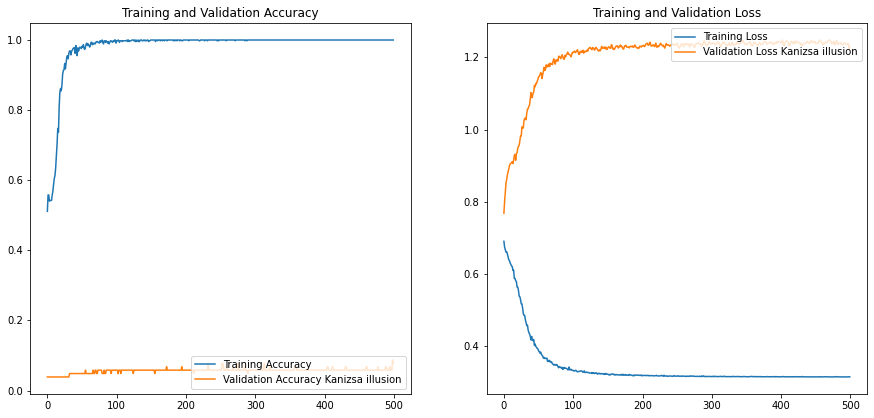

In [27]:
results(range(500),test_illusion,'Kanizsa illusion')

As we can see the model is trained to a good accuracy, however the model does not perceive the illusion as a square (The orange line refers to models performance in perceiving the illusion as sqaure, which is very low). At the time of writting this code thge authors who proposed this method have not posted any code in their github for this paper. This project was to investigate their model and try build a computational model to validfate their claims, however the model in our implementation fails to produce the results that were claimed in the paper. Im open to suggestions so as to why this might have happened. However I can assure you that I have done a lot of fine tuning of the hyperparaters, and the result is same in all. I can also assure that the approach used in this project was also followed step by step according to the paper, and the formula given to update the activations. The parameters might vary but still the heart of the method is same, and this puts me in a situation to suspect if the method is actually valid? 

In [28]:
predictive_classifier_test_pacman = classifier_model((8,8,1))

In [29]:
opt = keras.optimizers.Adam(lr=0.0001)
predictive_classifier_test_pacman.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [30]:
test_pacman = predictive_classifier_test_pacman.fit(predicted_train,train_data_label,epochs = 500 , validation_data = (predicted_test[0:150], classifier_test_label[0:150]))

Train on 448 samples, validate on 150 samples
Epoch 1/500
448/448 [==============================] - 0s 940us/sample - loss: 0.6950 - accuracy: 0.4866 - val_loss: 0.6707 - val_accuracy: 1.0000
Epoch 2/500
448/448 [==============================] - 0s 158us/sample - loss: 0.6852 - accuracy: 0.5179 - val_loss: 0.6295 - val_accuracy: 1.0000
Epoch 3/500
448/448 [==============================] - 0s 159us/sample - loss: 0.6739 - accuracy: 0.5335 - val_loss: 0.5887 - val_accuracy: 1.0000
Epoch 4/500
448/448 [==============================] - 0s 151us/sample - loss: 0.6701 - accuracy: 0.5268 - val_loss: 0.5598 - val_accuracy: 1.0000
Epoch 5/500
448/448 [==============================] - 0s 154us/sample - loss: 0.6637 - accuracy: 0.5312 - val_loss: 0.5490 - val_accuracy: 1.0000
Epoch 6/500
448/448 [==============================] - 0s 169us/sample - loss: 0.6690 - accuracy: 0.5268 - val_loss: 0.5414 - val_accuracy: 1.0000
Epoch 7/500
448/448 [==============================] - 0s 174us/sample -

448/448 [==============================] - 0s 165us/sample - loss: 0.3811 - accuracy: 0.9754 - val_loss: 0.3472 - val_accuracy: 1.0000
Epoch 57/500
448/448 [==============================] - 0s 142us/sample - loss: 0.3835 - accuracy: 0.9777 - val_loss: 0.3467 - val_accuracy: 1.0000
Epoch 58/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3789 - accuracy: 0.9821 - val_loss: 0.3442 - val_accuracy: 1.0000
Epoch 59/500
448/448 [==============================] - 0s 180us/sample - loss: 0.3800 - accuracy: 0.9754 - val_loss: 0.3434 - val_accuracy: 1.0000
Epoch 60/500
448/448 [==============================] - 0s 155us/sample - loss: 0.3723 - accuracy: 0.9888 - val_loss: 0.3420 - val_accuracy: 1.0000
Epoch 61/500
448/448 [==============================] - 0s 161us/sample - loss: 0.3743 - accuracy: 0.9821 - val_loss: 0.3411 - val_accuracy: 1.0000
Epoch 62/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3703 - accuracy: 0.9821 - val_loss: 0.3389 

448/448 [==============================] - 0s 173us/sample - loss: 0.3346 - accuracy: 0.9955 - val_loss: 0.3185 - val_accuracy: 1.0000
Epoch 112/500
448/448 [==============================] - 0s 158us/sample - loss: 0.3324 - accuracy: 0.9955 - val_loss: 0.3184 - val_accuracy: 1.0000
Epoch 113/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3311 - accuracy: 0.9955 - val_loss: 0.3208 - val_accuracy: 1.0000
Epoch 114/500
448/448 [==============================] - 0s 140us/sample - loss: 0.3327 - accuracy: 0.9978 - val_loss: 0.3195 - val_accuracy: 1.0000
Epoch 115/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3305 - accuracy: 0.9978 - val_loss: 0.3193 - val_accuracy: 1.0000
Epoch 116/500
448/448 [==============================] - 0s 149us/sample - loss: 0.3284 - accuracy: 0.9978 - val_loss: 0.3184 - val_accuracy: 1.0000
Epoch 117/500
448/448 [==============================] - 0s 149us/sample - loss: 0.3279 - accuracy: 1.0000 - val_loss: 0

448/448 [==============================] - 0s 174us/sample - loss: 0.3207 - accuracy: 1.0000 - val_loss: 0.3155 - val_accuracy: 1.0000
Epoch 167/500
448/448 [==============================] - 0s 169us/sample - loss: 0.3244 - accuracy: 0.9955 - val_loss: 0.3160 - val_accuracy: 1.0000
Epoch 168/500
448/448 [==============================] - 0s 265us/sample - loss: 0.3225 - accuracy: 0.9955 - val_loss: 0.3163 - val_accuracy: 1.0000
Epoch 169/500
448/448 [==============================] - 0s 380us/sample - loss: 0.3204 - accuracy: 1.0000 - val_loss: 0.3153 - val_accuracy: 1.0000
Epoch 170/500
448/448 [==============================] - 0s 171us/sample - loss: 0.3210 - accuracy: 0.9978 - val_loss: 0.3154 - val_accuracy: 1.0000
Epoch 171/500
448/448 [==============================] - 0s 178us/sample - loss: 0.3201 - accuracy: 1.0000 - val_loss: 0.3156 - val_accuracy: 1.0000
Epoch 172/500
448/448 [==============================] - 0s 181us/sample - loss: 0.3203 - accuracy: 1.0000 - val_loss: 0

448/448 [==============================] - 0s 159us/sample - loss: 0.3172 - accuracy: 1.0000 - val_loss: 0.3139 - val_accuracy: 1.0000
Epoch 222/500
448/448 [==============================] - 0s 172us/sample - loss: 0.3186 - accuracy: 0.9978 - val_loss: 0.3141 - val_accuracy: 1.0000
Epoch 223/500
448/448 [==============================] - 0s 350us/sample - loss: 0.3176 - accuracy: 1.0000 - val_loss: 0.3143 - val_accuracy: 1.0000
Epoch 224/500
448/448 [==============================] - 0s 163us/sample - loss: 0.3181 - accuracy: 1.0000 - val_loss: 0.3147 - val_accuracy: 1.0000
Epoch 225/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3173 - accuracy: 1.0000 - val_loss: 0.3147 - val_accuracy: 1.0000
Epoch 226/500
448/448 [==============================] - 0s 201us/sample - loss: 0.3166 - accuracy: 1.0000 - val_loss: 0.3142 - val_accuracy: 1.0000
Epoch 227/500
448/448 [==============================] - 0s 210us/sample - loss: 0.3172 - accuracy: 1.0000 - val_loss: 0

Epoch 276/500
448/448 [==============================] - 0s 170us/sample - loss: 0.3159 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 1.0000
Epoch 277/500
448/448 [==============================] - 0s 169us/sample - loss: 0.3147 - accuracy: 1.0000 - val_loss: 0.3139 - val_accuracy: 1.0000
Epoch 278/500
448/448 [==============================] - 0s 259us/sample - loss: 0.3152 - accuracy: 1.0000 - val_loss: 0.3139 - val_accuracy: 1.0000
Epoch 279/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3162 - accuracy: 0.9978 - val_loss: 0.3138 - val_accuracy: 1.0000
Epoch 280/500
448/448 [==============================] - 0s 165us/sample - loss: 0.3154 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 1.0000
Epoch 281/500
448/448 [==============================] - 0s 161us/sample - loss: 0.3154 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 1.0000
Epoch 282/500
448/448 [==============================] - 0s 185us/sample - loss: 0.3159 - accuracy: 1.0000

Epoch 331/500
448/448 [==============================] - 0s 367us/sample - loss: 0.3157 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 1.0000
Epoch 332/500
448/448 [==============================] - 0s 372us/sample - loss: 0.3154 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 1.0000
Epoch 333/500
448/448 [==============================] - 0s 361us/sample - loss: 0.3150 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 1.0000
Epoch 334/500
448/448 [==============================] - 0s 166us/sample - loss: 0.3158 - accuracy: 0.9978 - val_loss: 0.3137 - val_accuracy: 1.0000
Epoch 335/500
448/448 [==============================] - 0s 148us/sample - loss: 0.3143 - accuracy: 1.0000 - val_loss: 0.3138 - val_accuracy: 1.0000
Epoch 336/500
448/448 [==============================] - 0s 159us/sample - loss: 0.3146 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 1.0000
Epoch 337/500
448/448 [==============================] - 0s 233us/sample - loss: 0.3146 - accuracy: 1.0000

Epoch 386/500
448/448 [==============================] - 0s 369us/sample - loss: 0.3141 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 1.0000
Epoch 387/500
448/448 [==============================] - 0s 250us/sample - loss: 0.3145 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 1.0000
Epoch 388/500
448/448 [==============================] - 0s 156us/sample - loss: 0.3141 - accuracy: 1.0000 - val_loss: 0.3136 - val_accuracy: 1.0000
Epoch 389/500
448/448 [==============================] - 0s 235us/sample - loss: 0.3150 - accuracy: 1.0000 - val_loss: 0.3137 - val_accuracy: 1.0000
Epoch 390/500
448/448 [==============================] - 0s 329us/sample - loss: 0.3152 - accuracy: 0.9978 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 391/500
448/448 [==============================] - 0s 279us/sample - loss: 0.3144 - accuracy: 1.0000 - val_loss: 0.3135 - val_accuracy: 1.0000
Epoch 392/500
448/448 [==============================] - 0s 158us/sample - loss: 0.3144 - accuracy: 1.0000

Epoch 441/500
448/448 [==============================] - 0s 372us/sample - loss: 0.3138 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 442/500
448/448 [==============================] - 0s 381us/sample - loss: 0.3138 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 443/500
448/448 [==============================] - 0s 217us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 444/500
448/448 [==============================] - 0s 316us/sample - loss: 0.3139 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 445/500
448/448 [==============================] - 0s 153us/sample - loss: 0.3138 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 446/500
448/448 [==============================] - 0s 167us/sample - loss: 0.3139 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 447/500
448/448 [==============================] - 0s 186us/sample - loss: 0.3140 - accuracy: 1.0000

Epoch 496/500
448/448 [==============================] - 0s 347us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 497/500
448/448 [==============================] - 0s 334us/sample - loss: 0.3135 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 498/500
448/448 [==============================] - 0s 343us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000
Epoch 499/500
448/448 [==============================] - 0s 237us/sample - loss: 0.3137 - accuracy: 1.0000 - val_loss: 0.3134 - val_accuracy: 1.0000
Epoch 500/500
448/448 [==============================] - 0s 170us/sample - loss: 0.3140 - accuracy: 1.0000 - val_loss: 0.3133 - val_accuracy: 1.0000


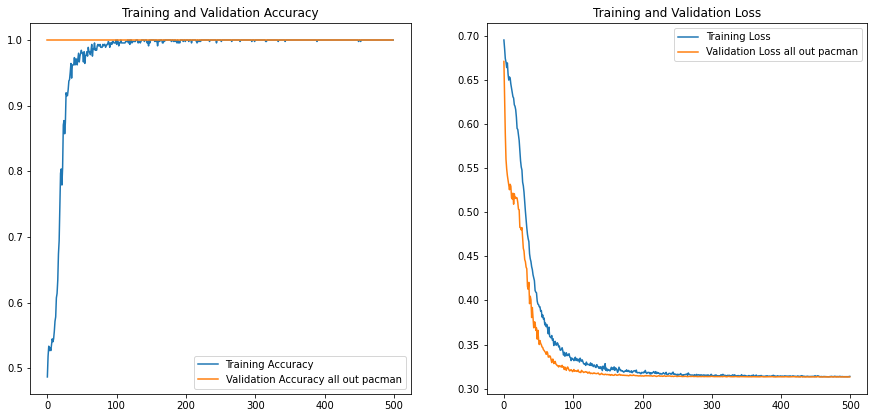

In [31]:
results(range(500),test_pacman,'all out pacman')

Here you can notice that the model classifies the pacmans accurately. So we can conclude at this point in time that the implemented model cannot perceive the illusion but is good at recognizing things as they are. 